# Chapter 04. 다양한 분류 알고리즘: 럭키백의 확률을 계산하라!  
## 04-1. 로지스틱 회귀  
Keyword: 로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수  

### 럭키백의 확률  
럭키백에 들어갈 수 있는 생선 = 7개
이벤트를 잘 마치려면 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력  
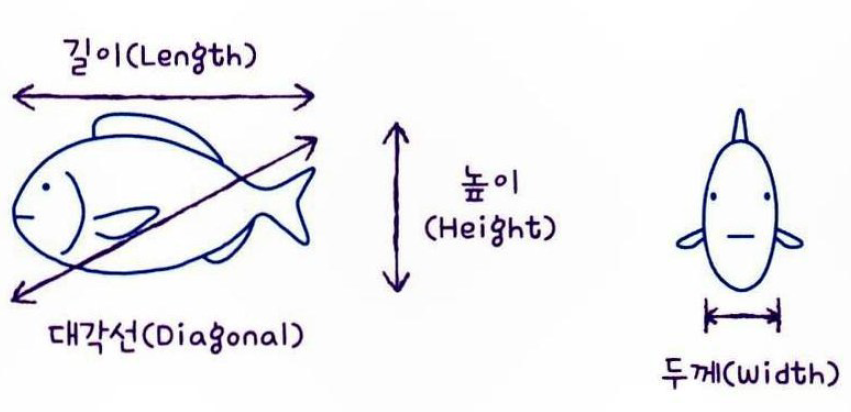

k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률을 계산

In [7]:
#데이터 준비하기

#판다스의 read_csv() 함수로 CSV파일을 데이터 프레임으로 변환한 다음 head() 메서드로 처음 5개 행 출력

import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
#어떤 종류의 생선이 있는지 Species 열에서 고유값 추출
#판다스의 unique() 함수 사용
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [9]:
#Species 열을 타깃으로 만들고, 나머지 5개 열은 입력 데이터로 사용
#데이터프레임에서 열을 선택하는 방법은 원하는 열을 리스트로 나열
#Species 열 빼고 나머지 5개의 열을 선택
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

#데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환
#fish_input이라는 변수에 저장 후 처음 5개 행 출력
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [10]:
#타깃 데이터 생성
fish_target = fish['Species']

In [11]:
#머신 러닝을 위한 데이터 세트 2개 준비
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

#사이킷런의 StandardScaler 클래스를 사용하여 훈련 세트와 데스트 세트를 표준화 전처리
#훈련 세트의 통계 값으로 테스트 세트를 변환해야 함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
#k-최근접 이웃 분류기의 확률 예측
#사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련
#-> 훈션 세트와 테스트 세트의 점수를 확인
#최근접 이웃 개수인 k를 3으로 지정하여 사용
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- **다중분류(multi-class classfication)** : 타깃 데이터에 2개 이상의 클래스가 포함된 문제  
- 타깃값을 그대로 사이킷런 모델에 전달하면 알파벳 순서로 매겨짐  
- 따라서 pd.unique(fish['Species'])로 출력된 순서와 다름  
- KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장

In [13]:
print(kn.classes_)
#'Bream'이 첫번째 클래스, 'Parkki'가 두번째 클래스

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [14]:
#테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


5개의 샘플에 대한 예측 -> 사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환  
테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력  
넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림  
*decimals* 매개변수로 유지할 소수점 아래 자릿수 지정 가능

In [15]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #소수점 네 번째 자리까지 표기 (다섯 번째 자리에서 반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba() 메서드의 출력 순서는 classes_ 속성과 같음  
즉 첫 번재 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률  
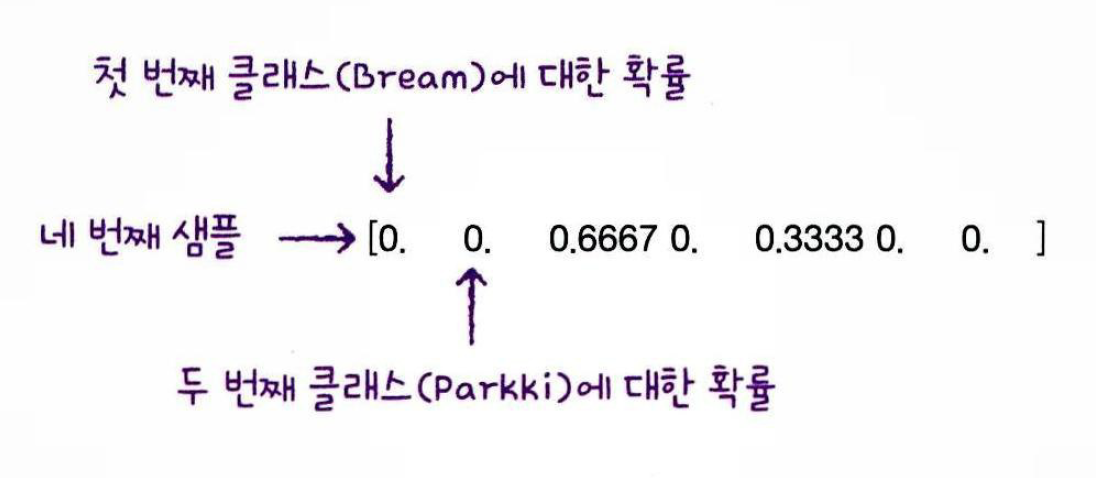  

In [16]:
#네 번째 샘플의 최근접 이웃의 클래스를 확인
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

#판다스의 iloc 메서드는 주어진 값을 정수 인덱스로 사용해 행이나 열을 선택
#여기에서는 indexes 배열(104, 115, 106)을 사용해 train_target의 105, 116, 107번째 행을 선택

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고, 세 번째 클래스인 'Perch'가 2개  
따라서 다섯 번재 클래스에 대한 확률은 1/3 = 0.3333이고 세 번째 클래스에 대한 확률은 2/3 = 0.6667  
앞서 predict_proba() 메서드가 출력한 네 번째 샘플의 클래스 확률과 같음  

하지만, 3개의 최근접 이웃을 사용하기 때문에 가능한 확류은 0/3, 1/3, 2/3, 3/3이 전부 -> 더 좋은 방법을 찾아야 함

### 로지스틱 회귀

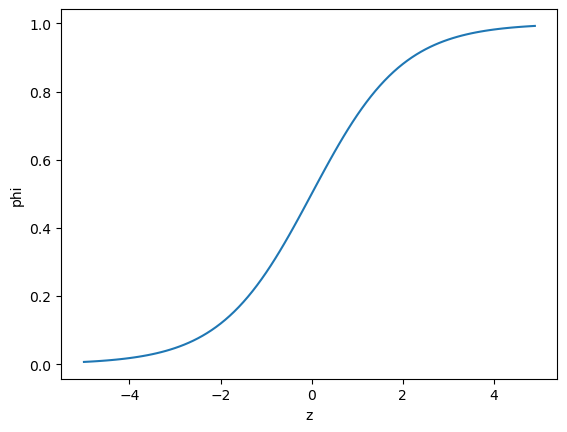

In [17]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [19]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

print(lr.predict_proba(train_bream_smelt[:5]))

print(lr.classes_)

print(lr.coef_, lr.intercept_)

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

from scipy.special import expit
print(expit(decisions))

['A' 'C']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행하기

In [20]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print(lr.classes_)

print(lr.coef_.shape, lr.intercept_.shape)

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 04-2. 확률적 경사 하강법  
keyword: 확률적 경사 하강법, 손실 함수, 에포크

### SGDClassifier

In [22]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.7983193277310925
0.775


/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### 에포크와 과대/과소적합

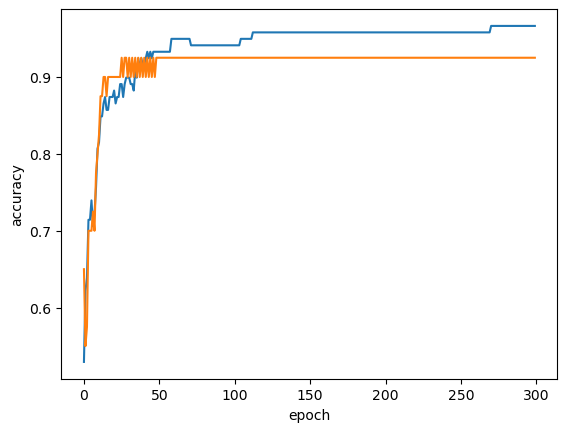

0.957983193277311
0.925
0.9495798319327731
0.925


In [23]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc=SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))